In [ ]:

## Dated - 18th April 2021

In [100]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import nltk 
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Natural Language Tool Kit
import nltk 
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
!pip install wordcloud

### Importing dataset

In [102]:

df_Amz_Prd = pd.read_csv("D:\IPBA\\Python\\Graded Assignment 6\\Consumer_Reviews_of_Amazon_Products_May19.csv") 

### Understanding the Data

In [145]:
df_Amz_Prd.head()

id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
1  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
2  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
3  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   
4  Amazonbasics  AA,AAA,Health,Electronics,Health & Household,C...   

  primaryCategories                                          imageURLs  \
0   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
1   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
2   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
3   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   
4   Health & Beauty  https://images-na.ssl-images-amazon.com/images...   

                                                keys  ... reviews_didPurchase  \
0  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
1  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
2  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
3  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   
4  amazonbasics/hl002619,amazonbasicsaaaperforman...  ...                 NaN   

  reviews_doRecommend reviews_id reviews_numHelpful reviews_rating  \
0                 NaN        NaN                NaN              3   
1                 NaN        NaN                NaN              4   
2                 NaN        NaN                NaN              5   
3                 NaN        NaN                NaN              5   
4                 NaN        NaN                NaN              5   

                                  reviews_sourceURLs  \
0  https://www.amazon.com/product-reviews/B00QWO9...   
1  https://www.amazon.com/product-reviews/B00QWO9...   
2  https://www.amazon.com/product-reviews/B00QWO9...   
3  https://www.amazon.com/product-reviews/B00QWO9...   
4  https://www.amazon.com/product-reviews/B00QWO9...   

                                        reviews_text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                       reviews_title  reviews_username  \
0  ... 3 of them and one of the item is bad quali...        Byger yang   
1  ... always the less expensive way to go for pr...              ByMG   
2  ... are not Duracell but for the price i am ha...  BySharon Lambert   
3  ... as well as name brand batteries at a much ...     Bymark sexson   
4  ... batteries are very long lasting the price ...           Bylinda   

                                          sourceURLs  
0  https://www.barcodable.com/upc/841710106442,ht...  
1  https://www.barcodable.com/upc/841710106442,ht...  
2  https://www.barcodable.com/upc/841710106442,ht...  
3  htt

In [146]:
df_Amz_Prd.sample(5)

id             dateAdded           dateUpdated  \
23899  AVph0EeEilAPnD_x9myq  2017-01-11T06:58:33Z  2019-02-25T02:05:06Z   
23993  AVph0EeEilAPnD_x9myq  2017-01-11T06:58:33Z  2019-02-25T02:05:06Z   
1279   AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
9709   AVpe7xlELJeJML43ypLz  2015-12-03T01:23:41Z  2019-04-24T02:17:42Z   
22913  AVph0EeEilAPnD_x9myq  2017-01-11T06:58:33Z  2019-02-25T02:05:06Z   

                                                    name  \
23899  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   
23993  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   
1279   AmazonBasics AAA Performance Alkaline Batterie...   
9709   AmazonBasics AA Performance Alkaline Batteries...   
22913  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   

                                  asins         brand  \
23899                        B018Y22C2Y        Amazon   
23993                        B018Y22C2Y        Amazon   
1279              B00QWO9P0O,B00LH3DMUO  Amazonbasics   
9709   B00QWO9P0O,B01IB83NZG,B00MNV8E0C  Amazonbasics   
22913                        B018Y22C2Y        Amazon   

                                              categories primaryCategories  \
23899  Computers,Fire Tablets,Electronics Features,Co...       Electronics   
23993  Computers,Fire Tablets,Electronics Features,Co...       Electronics   
1279   AA,AAA,Health,Electronics,Health & Household,C...   Health & Beauty   
9709   AA,AAA,Electronics Features,Health,Electronics...   Health & Beauty   
22913  Computers,Fire Tablets,Electronics Features,Co...       Electronics   

                                               imageURLs  \
23899  https://pisces.bbystatic.com/image2/BestBuy_US...   
23993  https://pisces.bbystatic.com/image2/BestBuy_US...   
1279   https://images-na.ssl-images-amazon.com/images...   
9709   https://images-na.ssl-images-amazon.com/images...   
22913  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                    keys  ...  \
23899  amazonfirekidsedition16gb5thgen2015releaseblue...  ...   
23993  amazonfirekidsedition16gb5thgen2015releaseblue...  ...   
1279   amazonbasics/hl002619,amazonbasicsaaaperforman...  ...   
9709   amazonbasicsaaperformancealkalinebatteries48co...  ...   
22913  amazonfirekidsedition16gb5thgen2015releaseblue...  ...   

      reviews_didPurchase reviews_doRecommend reviews_id reviews_numHelpful  \
23899                 NaN                True        NaN                0.0   
23993                 NaN                True        NaN                0.0   
1279                  NaN                 NaN        NaN                NaN   
9709                  NaN                 NaN        NaN                NaN   
22913                 NaN               False        NaN                0.0   

      reviews_rating                                 reviews_sourceURLs  \
23899              5  http://reviews.bestbuy.com/3545/5026000/review...   
23993              3  http://reviews.bestbuy.com/3545/5026000/review...   
1279               5  https://www.amazon.com/product-reviews/B00QWO9...   
9709               5  https://www.amazon.com/product-reviews/B00QWO9...   
22913              1  http://reviews.bestbuy.com/3545/5026000/review...   

                                            reviews_text  \
23899  Absolutely love this tablet. This is the secon...   
23993  Great for the kids but not much space for all ...   
1279        Amazon batteries are great for all my needs.   
9709                                            Love it.   
22913  The reviews on this on Amazon seemed awesome. ...   

                               reviews_title  reviews_username  \
23899  Love this tablet for my 1.5 year old!            Tmm714   
23993                                Not bad          Xcountry   
1279                              Five Stars           ByDACOW   
9709                              Five Stars         ByPhil S.   
22913       Chronic issue with c

In [147]:
df_Amz_Prd.shape

(28332, 24)

### Q.1 How many columns have over 20,000 missing values?

In [148]:
df_Amz_Prd.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews_date               0
reviews_dateSeen           0
reviews_didPurchase    28323
reviews_doRecommend    12246
reviews_id             28291
reviews_numHelpful     12217
reviews_rating             0
reviews_sourceURLs         0
reviews_text               0
reviews_title              0
reviews_username           0
sourceURLs                 0
dtype: int64

### Q.2 Draw a  countplot chart using seaborn on the “primaryCategories.” 
### Which “primaryCategories” has the highest product reviews? Please also add the chart to the ppt 

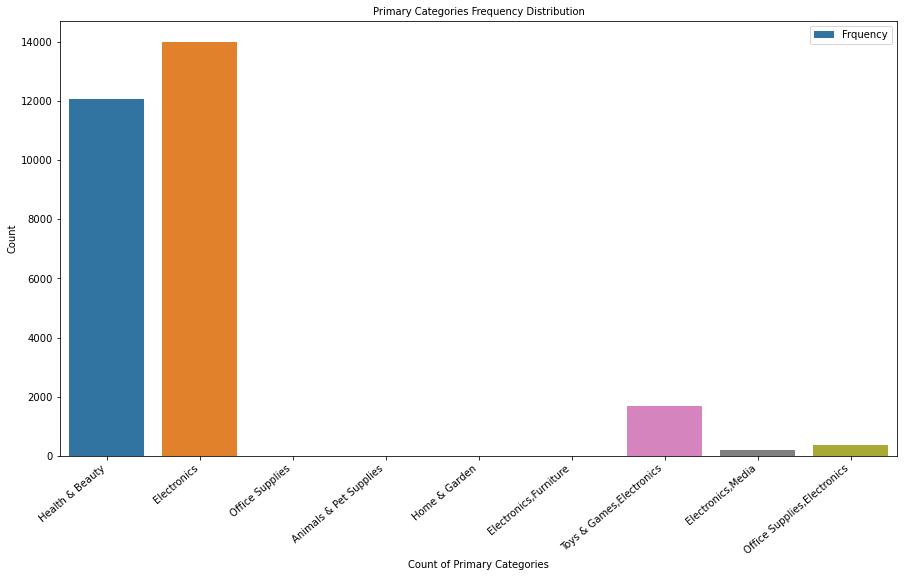

In [149]:
import seaborn as sns 
plt.figure(figsize = (15,8))
ar= sns.countplot( x='primaryCategories', data = df_Amz_Prd )
ar.set_xticklabels(ar.get_xticklabels(), rotation=40, ha="right")
plt.title('Primary Categories Frequency Distribution', fontsize = 10)
plt.xlabel("Count of Primary Categories", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.legend(['Frquency'])
plt.show()


### Q.3 Use seaborn to plot a chart showing 'reviews_rating' for each “primaryCategories” in a bar chart format. 
### Which “primaryCategories” has the 3rd highest 'reviews_rating'  of 5? Please also add the chart to the ppt.  

<AxesSubplot:xlabel='count', ylabel='primaryCategories'>

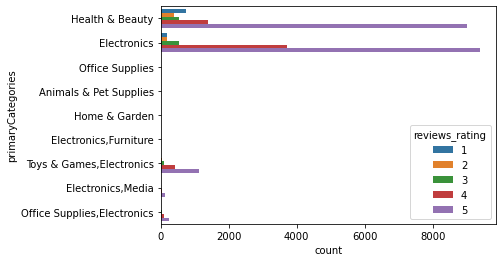

In [150]:
sns.countplot( y='primaryCategories',  hue = 'reviews_rating', data = df_Amz_Prd )

In [ ]:
df_Amz_Prd.primaryCategories.value_counts()

In [ ]:
(df_Amz_Prd.primaryCategories.value_counts() < 5).sum()

### Q.4 Assume Negative feedback are feedback with 'reviews_rating' of 1. 
### We converted the negative “reviews_text” as a text string. 
### We used part of speech tagging to identify the POS tag for the first 20 words. 
### One of the word was “know”. What POS  tag was assigned to it?

In [151]:
df_Amz_Prd_NR = df_Amz_Prd[df_Amz_Prd['reviews_rating']==1]

Negative_TS = []
for text in df_Amz_Prd_NR.reviews_text:  
    Negative_TS.append(text)
Negative_TS[:4]


["I don't know if I would buy thus brand again seems like they don't last as long as Duracell",
 'These do not last long at all very cheap batteries no happy',
 "These batteries are horrible. We depend on AA batteries for many wireless microphone and have found that brand-name batteries last about a month per our usage. We switched to Amazon basics to try it out when a subscription for our preferred brand was no longer available and have found that, under the same usage, these batteries last about a week. That's a 1/4 capacity.",
 'First time I bought these they worked well and lasted almost as long as the name brands. Not the same this time around, almost no charge - 4-6 hours of run time - Junk batteries.']

In [152]:
Negative_TS_2 = pd.Series(Negative_TS).str.cat(sep = ' ')


In [153]:
Rqd_TX = Negative_TS_2[:20]


In [154]:
print(pos_tag(word_tokenize(Rqd_TX)))


[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('if', 'IN'), ('I', 'PRP'), ('wo', 'MD')]


### Q.5 We made a dataframe which had  'reviews_rating' of 5 and primaryCategories as "Electronics."
### We converted the negative “reviews_title” as a text string.
### We used part of speech tagging to identify the POS tag for the first 20 words. 
### The text contained a word “excellent”. What POS tag was assigned to it?

In [155]:
df_Amz_Prd_Positive_FB = df_Amz_Prd[(df_Amz_Prd['reviews_rating']==5) & (df_Amz_Prd['primaryCategories']=='Electronics')]

In [156]:
Positive_TS = []
for text in df_Amz_Prd_Positive_FB.reviews_title:  
    Positive_TS.append(text)

In [157]:
Positive_TS_2 = pd.Series(Positive_TS).str.cat(sep = ' ')

In [158]:
Rqd_TX2 = Positive_TS_2[:20]

In [159]:
print(pos_tag(word_tokenize(Rqd_TX2)))

[('Excellent', 'JJ'), ('product', 'NN'), ('It', 'PRP')]


### Q.6 Negative feedback are feedback with 'reviews_rating' of 1. 
### Plot a Word Cloud and please also add the chart to the ppt (do not perform stemming/lemmatization). 
### Which is not in the top 20 most frequently occurring word in the negative feedback word cloud of “reviews_text” ?

In [160]:
word_cloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate("reviews_text")

In [161]:
word_cloud_2 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(Negative_TS_2)

(-0.5, 1599.5, 799.5, -0.5)

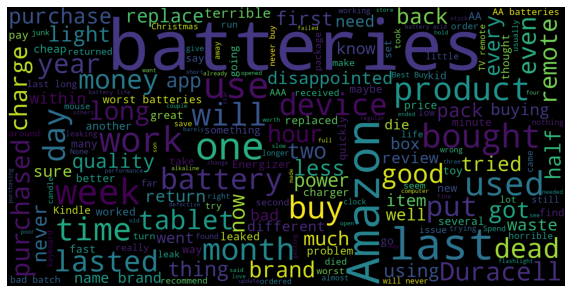

In [162]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud_2)
plt.axis("off")

### Q.7 Positive feedback are feedback with 'reviews_rating' of 5. 
### Plot a Word Cloud and please also add the chart to the ppt (do not perform stemming/lemmatization). 
### What word/phrase occurs in the top 10 most frequently occurring word in the positive feedback word cloud of “reviews_text”?  

In [163]:
df_Amz_Prd_NR = df_Amz_Prd[df_Amz_Prd['reviews_rating']==5]

Positive_TS1 = []
for text in df_Amz_Prd_NR.reviews_text:  # Go to the "reviews_text" column of "neg_phrases2" dataframe
    Positive_TS1.append(text)

In [164]:
Positive_TS2 = pd.Series(Positive_TS1).str.cat(sep = ' ')

In [165]:
Rqd_TX1 = Positive_TS2[:20]

In [166]:
print(pos_tag(word_tokenize(Rqd_TX1)))

[('Well', 'RB'), ('they', 'PRP'), ('are', 'VBP'), ('not', 'RB'), ('Du', 'NNP')]


In [167]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate("reviews_text")

In [168]:
wordcloud2 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(Positive_TS2)

(-0.5, 1599.5, 799.5, -0.5)

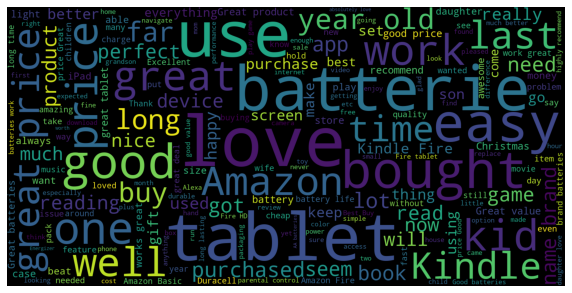

In [169]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis("off")

### Q.8 Neutral feedback are feedback with 'reviews_rating' of 3. 
### Plot a Word Cloud and please also add the chart to the ppt  (do not perform stemming/lemmatization). 
### What word/phrase occurs in the top 10 most frequently occurring word in the Neutral feedback word cloud of “reviews_text”? 

In [170]:
df_Amz_Prd_NB = df_Amz_Prd[df_Amz_Prd['reviews_rating']==3]

Neutral_FB = []
for text in df_Amz_Prd_NB.reviews_text:  # Go to the "reviews_text" column of "neg_phrases2" dataframe
    Neutral_FB.append(text)


In [171]:
Neutral_FB2 = pd.Series(Neutral_FB).str.cat(sep = ' ')

In [172]:
Neutal_TX1 = Neutral_FB2[:20]

In [173]:
print(pos_tag(word_tokenize(Neutal_TX1)))

[('I', 'PRP'), ('order', 'NN'), ('3', 'CD'), ('of', 'IN'), ('them', 'PRP'), ('an', 'DT')]


In [174]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate("reviews_text")

In [175]:
wordcloud2 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(Neutral_FB2)

(-0.5, 1599.5, 799.5, -0.5)

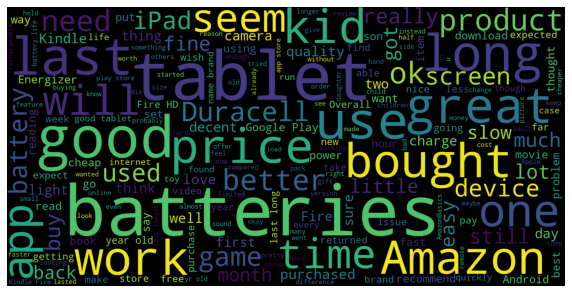

In [176]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis("off")

### Q.9 We made a dataframe which had   'reviews_rating' of 1 
### and primaryCategories as "Health & Beauty" We made a wordcloud on the “reviews_text”  (do not perform stemming/lemmatization). 
### What word/phrase does NOT occur in the top 10 most frequently occurring word in the  word cloud of “reviews_text”?

In [177]:
df_Amz_Prd_Positive_FB = df_Amz_Prd[(df_Amz_Prd['reviews_rating']==5) & (df_Amz_Prd['primaryCategories']=='Electronics')]

In [178]:
# Question 9
df_Amz_Prd_NR1 = df_Amz_Prd[(df_Amz_Prd['reviews_rating']==1) & (df_Amz_Prd['primaryCategories']=='Health & Beauty')]

Negative_TS_1 = []
for text in df_Amz_Prd_NR1.reviews_text:  # Go to the "reviews_text" column of "neg_phrases2" dataframe
    Negative_TS_1.append(text)

In [179]:
Negative_TS2 = pd.Series(Negative_TS_1).str.cat(sep = ' ')

In [180]:
Rqd_TX_1 = Negative_TS2[:20]

In [181]:
print(pos_tag(word_tokenize(Rqd_TX_1)))

[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('if', 'IN'), ('I', 'PRP'), ('wo', 'MD')]


In [182]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate("reviews_text")

In [192]:
wordcloud2 = WordCloud(width = 1600, height = 800, max_font_size = 200, background_color='white').generate(Negative_TS2)

(-0.5, 1599.5, 799.5, -0.5)

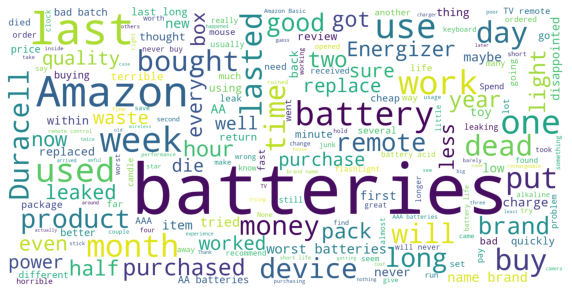

In [193]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis("off")

In [185]:
new = pd.DataFrame(WordCloud().process_text(Negative_TS2), index=[1]).transpose()
new = new.sort_values(by=1, ascending=False)
new.head(20)

1
batteries  824
last       224
Amazon     207
week       129
use        127
one        121
used       118
battery    117
work       116
month      102
buy         91
day         91
lasted      91
put         90
dead        86
time        85
bought      82
device      77
Duracell    76
will        75

In [189]:
WordCloud().process_text(Negative_TS2)["plastic"]

6